# PC algorithm

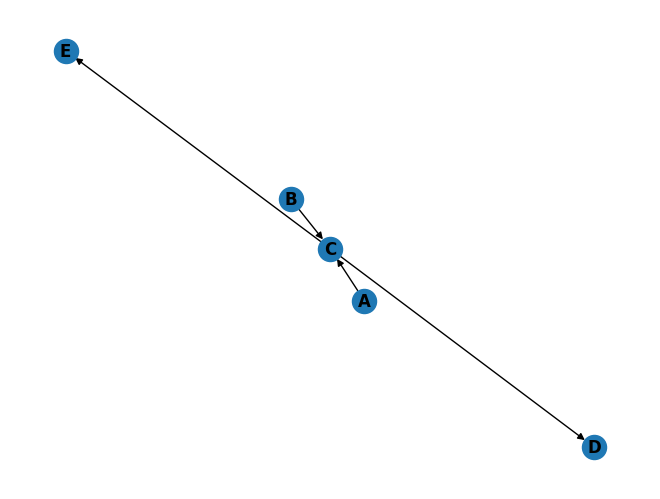

In [7]:
import numpy as np
import pandas as pd
import cdt
cdt.SETTINGS.rpath = "C:/PROGRA~1/R/R-42~1.2/bin/x64/Rscript"
# cdt.SETTINGS.rpath = "C:/Program Files/R/R-4.2.2/bin/x64/Rscript"
# cdt.SETTINGS.rpath = "C:/Users/bends/OneDrive/Skrivebord/R_PCalg.R"
# cdt.SETTINGS.rpath = '/usr/local/bin/Rscript' # this path should point to your own R implementation !
from cdt.causality.graph import PC
import networkx as nx
import matplotlib.pyplot as plt

def simulate_data(n_obs):
    '''
    Simulate data from the following graph

        A       B
         \     /
          v   v
            C
          /   \
         v     v
        D       E
    '''
    A = np.random.normal(size = n_obs)
    B = np.random.normal(size = n_obs)
    C = A + B + np.random.normal(size = n_obs)*0.25
    D = C + np.random.normal(size = n_obs)*0.25
    E = C + np.random.normal(size = n_obs)*0.25
    return np.stack((A,B,C,D,E), axis =1)

# generate data
n = 10000
data = simulate_data(n)

permutation = [0,1,2,3,4]
names = np.array(["A","B", "C", "D", "E"])
data_df = pd.DataFrame(data, columns = names)
pc_test = PC(CItest = 'gaussian', alpha = 0.05, verbose=True).create_graph_from_data(data_df[names[permutation]])

nx.draw(pc_test, with_labels=True, font_weight='bold')
plt.show()

In [7]:
#Check the packages
cdt.utils.R.DefaultRPackages()

['init: False', 'pcalg: True', 'kpcalg: True', 'bnlearn: True', 'sparsebn: False', 'D2C: False', 'SID: False', 'CAM: False', 'RCIT: True']

In [24]:
pc_test.get_edge_data

<bound method Graph.get_edge_data of <networkx.classes.digraph.DiGraph object at 0x00000255802452E0>>